In [157]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
import pywt


In [158]:
def load_data_DB1(subject,exercise):
    data = loadmat(f'../Dataset/DB1/s{subject}/S{subject}_A1_E{exercise}.mat')
    return data

In [159]:
def get_start_indexes(data,movement,target):
    start_indexes=[]
    for idx,move in enumerate(data[target]):
        if move[0] == movement and data[target][idx-1][0] == 0:
            start_indexes.append(idx)
        if len(start_indexes) == 10:
            break
    return start_indexes

In [160]:
def get_movement_df(data,movement,target):
    '''
    Returns the repetitions of a movement based on fixed length of repetition.
    if target is stimulus then each rep takes 5 seconds but if target is restimulus then each rep takes 2 seconds
    '''
    start_indexes = get_start_indexes(data,movement,target)
    df= pd.DataFrame()
    step = 500 if target == 'stimulus' else 200
    for i in start_indexes:
        new_row = data['emg'][i:i+step]
        df = df.append(pd.DataFrame(new_row),ignore_index=True)
    target_movement = np.full((2000,1),movement,dtype=int)
    df['target'] = target_movement
    return df

In [161]:
def get_movement_df_flattened(data,movement,target):
    '''
    Returns the repetitions of a movement based on fixed length of repetition.
    if target is stimulus then each rep takes 5 seconds but if target is restimulus then each rep takes 2 seconds
    '''
    start_indexes = get_start_indexes(data,movement,target)
    df= pd.DataFrame()
    step = 500 if target == 'stimulus' else 200
    for i in start_indexes:
        new_row = data['emg'][i:i+step].flatten()
        df = df.append(pd.Series(new_row),ignore_index=True)
    target_movement = np.full((10,1),movement,dtype=int)
    df['target'] = target_movement
    return df

In [335]:
d = get_movement_df_flattened(data, movement=1,target='restimulus')
d

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0171,0.0073,0.0024,0.0024,0.0024,0.0024,0.0757,0.0317,0.0024,0.0146,...,0.0024,0.0195,0.0024,0.0024,0.0024,0.0146,0.0488,0.0073,0.0024,1
1,0.0488,0.0073,0.0024,0.0024,0.0024,0.0024,0.0171,0.0488,0.0024,0.0049,...,0.0269,0.0024,0.0049,0.0024,0.0024,0.0806,0.0659,0.0024,0.0024,1
2,0.0073,0.0073,0.0024,0.0024,0.0024,0.0024,0.0269,0.0391,0.0024,0.0049,...,0.2197,0.0562,0.0024,0.0024,0.0024,0.1318,0.0439,0.2441,0.0122,1
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0659,0.0342,0.0024,0.0098,...,0.3931,0.2759,0.0171,0.0024,0.0024,0.3101,0.0952,0.5103,0.1880,1
4,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0098,0.0244,0.0049,0.0024,...,0.1685,0.0024,0.0122,0.0024,0.0024,0.1196,0.0537,0.0513,0.0024,1
5,0.0024,0.0952,0.0024,0.0024,0.0024,0.0024,0.0317,0.0146,0.1318,0.0317,...,0.4004,0.3833,0.0146,0.0024,0.0024,0.1855,0.0732,0.5005,0.0513,1
6,0.0024,0.0586,0.1563,0.0024,0.0024,0.0024,0.0269,0.0415,0.2124,0.0024,...,0.3467,0.5322,0.0220,0.0024,0.0024,0.2100,0.1099,0.5371,0.0977,1
7,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0977,0.0220,0.0024,0.0146,...,0.0781,0.1318,0.0024,0.0024,0.0024,0.1733,0.0659,0.1538,0.0195,1
8,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0098,0.0415,0.0024,0.0146,...,0.1709,0.1514,0.0171,0.0049,0.0024,0.1099,0.0610,0.2612,0.0464,1
9,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.0464,0.0195,0.0781,...,0.1953,0.2051,0.0024,0.0024,0.0024,0.1978,0.0830,0.3052,0.0781,1


In [162]:
def extract_MAV(window):
    return np.mean(window)

In [163]:
def extract_RMS(window):
    return np.sqrt(np.mean(window ** 2))

In [164]:
def extract_VAR(window):
    return np.var(window)

In [165]:
def extract_HIST(window):
    return  np.histogram(window, bins=20)

In [166]:
def extract_WL(window):
    waveform_length = 0
    for i in np.arange(0, len(window) - 1):
        waveform_length += abs(window[i+1] - window[i])    
    return waveform_length

In [167]:
def extract_Slope_Sign_Changes(window):
    
    count = 1
    for i in np.arange(1, len(window) - 1):
        val = (window[i] - window[i-1]) * (window[i] - window[i+1])
        if(val >= 0):
            count+=1
    return count

In [273]:
def extract_ZC(window):
    
    zero_crossing_count = 0
    threshold = np.mean(window)
    for i in np.arange(0,len(window) - 1):
        if (window[i] > threshold and window[i+1] < threshold) or (window[i] < threshold and window[i+1] > threshold):
            zero_crossing_count += 1
    return zero_crossing_count
#         return len(np.where(np.diff(np.sign(window)))[0])

In [215]:
def extract_features_per_electrode(electrode_data,electrode_data_transformed, increment=1, window_size=20):
    electrode_features = pd.DataFrame()

    n_windows = int(math.floor(len(electrode_data) - window_size + 1) / increment) - 1

    for w in np.arange(0,n_windows):

        current_window = np.array(electrode_data[w*increment:w*increment+window_size])
        
        current_window_features = {}
        current_window_features['MAV'] = extract_MAV(current_window)
        current_window_features['RMS'] = extract_RMS(current_window)
        current_window_features['VAR'] = extract_VAR(current_window)
        h = extract_HIST(current_window)
        for i in np.arange(0,20):
            current_window_features['Hist'+str(i)] = h[0][i]

        current_window_features['Waveform_Length'] = extract_WL(current_window)
        current_window_features['SSC'] = extract_Slope_Sign_Changes(current_window)
        
        next_window = np.array(electrode_data[(w+1)*increment:(w+1)*increment+window_size])
        next_window_MAV = extract_MAV(next_window)
        current_window_features['MAVS'] = current_window_features['MAV'] - next_window_MAV
        
        current_window_features['ZC'] = extract_ZC(current_window)
        
        electrode_features = electrode_features.append(current_window_features, ignore_index=True)
    
    return electrode_features

In [216]:
def extract_features_per_repetition(df, increment, window_size=20):

    n_electrodes = df.shape[1]
    repetition_features = pd.DataFrame()
    for e in np.arange(0, n_electrodes):
        electrode_features = pd.Series(np.array(extract_features_per_electrode(df[e], increment, window_size)).flatten())
        
#         electrode_features = extract_features_per_electrode(df[e],increment=increment, window_size=window_size)
#         electrode_features = pd.Series(electrode_features)
        
        repetition_features = repetition_features.append(electrode_features, ignore_index=True)
        
    return repetition_features

In [171]:
from sklearn.preprocessing import StandardScaler


def extract_features_per_movement(df, increment, window_size, movement):
    
    movement_features = pd.DataFrame()
    for i in np.arange(0,10): # 10 is number of repetitions of each movement
        current_rep = df.iloc[i*200:i*200 + 200, :]
        
        # Flatten the result
        repetition_features = pd.Series(np.array(extract_features_per_repetition(current_rep, increment=increment, window_size=window_size)).flatten())
        
        # Do Not Flatten the result
#         repetition_features = pd.DataFrame(extract_features_per_repetition(current_rep_transformed, increment=increment, window_size=window_size))

        movement_features = movement_features.append(repetition_features, ignore_index=True)        
        
    movement_features['target'] = np.full(shape=(len(movement_features),1),fill_value=movement)
    return movement_features

# Extracting Time Domain Features

Useful Links:
* https://lupinepublishers.com/biomedical-sciences-journal/fulltext/a-comprehensive-study-on-eMG-feature-extraction-and-classifiers.ID.000104.php

* http://www.psgminer.com/help/emg_features__.htm

**Subject 1 Exercise 1**

In [232]:
t = load_data_DB1(subject=1, exercise=1)
tf = pd.DataFrame(t['emg'])
tf.iloc[440:460,1]

440    0.0073
441    0.0244
442    0.0269
443    0.0195
444    0.0171
445    0.0293
446    0.0317
447    0.0244
448    0.0146
449    0.0049
450    0.0049
451    0.0171
452    0.0171
453    0.0146
454    0.0122
455    0.0073
456    0.0244
457    0.0415
458    0.0635
459    0.1196
Name: 1, dtype: float64

In [271]:
extract_Slope_Sign_Changes(np.array(tf.iloc[440:460,1]))

9

In [274]:
data = load_data_DB1(subject=3, exercise=1)

ex1_movements = np.arange(1,13)

features_df = pd.DataFrame()
features_df['target'] = 1
movements_df = pd.DataFrame()

for m in ex1_movements:
    df = get_movement_df(data=data, movement=m, target='restimulus')
    x = df.drop("target", axis=1)
    y = df["target"]
    
    # Append movements
#     movements_df = movements_df.append(df, ignore_index=True)
    
    # Append features extracted from movements
    movement_features_df = extract_features_per_movement(df=x, increment=1, window_size=20, movement=m)
    features_df = features_df.append(movement_features_df, ignore_index=True)


In [146]:
movements_df

""


In [275]:
features_df

,target,0,1,2,3,4,5,6,7,8,...,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159
0,1,1.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0,2.0,...,2.0,0.0,2.0,0.212760,0.034050,0.214988,8.0,0.000953,0.2562,3.0
1,1,2.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,...,0.0,1.0,2.0,0.232060,-0.008910,0.232218,12.0,0.000074,0.1197,7.0
2,1,2.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,3.0,1.0,0.093630,-0.000605,0.094149,11.0,0.000097,0.1271,6.0
3,1,1.0,0.0,3.0,0.0,2.0,0.0,3.0,0.0,2.0,...,2.0,0.0,0.0,0.016840,-0.010010,0.017293,13.0,0.000015,0.0317,2.0
4,1,9.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,...,0.0,4.0,0.0,0.016595,-0.007685,0.017584,10.0,0.000034,0.0538,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,12,3.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,1.0,1.0,2.0,0.124385,0.061030,0.126291,7.0,0.000478,0.2050,3.0
116,12,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.211915,0.143545,0.217211,10.0,0.002273,0.1856,1.0
117,12,14.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,0.002400,-0.000125,0.002400,19.0,0.000000,0.0000,0.0
118,12,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.158465,0.012100,0.159633,10.0,0.000371,0.1881,3.0


In [276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = features_df.drop("target", axis=1)
y = features_df["target"]

X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_features.shape, X_test_features.shape, y_train_features.shape, y_test_features.shape

((96, 2160), (24, 2160), (96,), (24,))

In [277]:
log = LogisticRegression(n_jobs=-1)

log.fit(X_train_features, y_train_features)

log.score(X_test_features, y_test_features)

0.75

In [278]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(X_train_features, y_train_features)

rfc.score(X_test_features, y_test_features)

0.7916666666666666

**Subject 1 Exercise 1 - 200 rows without feature extraction**

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

ex1_movements = list(range(1,13))

move1_df = pd.DataFrame()
for m in ex1_movements:
    move1_df = move1_df.append(get_movement_df_flattened(data=data, movement=m, target="restimulus"),ignore_index=True)


# Getting X & y
X = move1_df.drop("target", axis=1)
y = move1_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 2000), (24, 2000), (96,), (24,))

In [151]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.875

**Subject 1 Exercise 2** 

In [22]:
data = load_data_DB1(subject=1, exercise=2)

ex2_movements = np.arange(1,18)

features_df = pd.DataFrame()
features_df['target'] = 1
movements_df = pd.DataFrame()

for m in ex2_movements:
    df = get_movement_df(data=data, movement=m, target='restimulus')
    x = df.drop("target", axis=1)
    y = df["target"]
    
    # Append movements
    move_flattend = get_movement_df_flattened(data=data, movement=m, target='restimulus')
    movements_df = movements_df.append(move_flattend, ignore_index=True)
    
    # Append features extracted from movements
    movement_features_df = extract_features_per_movement(df=x, increment=19, window_size=20, movement=m)
    features_df = features_df.append(movement_features_df, ignore_index=True)


In [23]:
movements_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0488,0.0098,0.0024,0.0024,0.0049,0.0024,0.4077,0.1660,0.0024,0.0659,...,2.1631,1.0840,0.4980,0.2295,0.1172,0.5640,2.9077,1.0693,0.8081,1
1,0.1294,0.0220,0.0024,0.0024,0.0024,0.0024,0.3149,0.1294,0.0049,0.0977,...,1.3452,0.5273,0.1660,0.0757,0.0293,0.2954,3.0469,0.8691,0.4443,1
2,0.0513,0.0049,0.0024,0.0024,0.0024,0.0024,0.3467,0.1416,0.0024,0.0391,...,0.3516,0.1050,0.0195,0.0024,0.0024,0.0757,0.7007,0.1318,0.0293,1
3,0.0195,0.0244,0.0024,0.0024,0.0024,0.0024,0.0635,0.0806,0.0024,0.0122,...,0.3540,0.1025,0.0195,0.0024,0.0146,0.1538,0.5933,0.1074,0.0757,1
4,0.0244,0.0024,0.0024,0.0024,0.0024,0.0024,0.1587,0.0757,0.0024,0.0024,...,0.0757,0.0854,0.0024,0.0024,0.0024,0.0342,0.4907,0.0195,0.0049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0513,0.0366,0.0024,0.0024,0.0024,0.0024,0.1050,0.2246,0.0024,0.0488,...,2.8271,0.2490,0.1147,0.0903,0.1001,1.5039,4.6362,0.6592,0.0928,17
166,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0952,0.0830,0.0024,0.0391,...,1.8115,0.1147,0.0146,0.0024,0.0098,0.6299,2.0898,0.3076,0.0562,17
167,0.0024,0.0024,0.0122,0.0146,0.0024,0.0024,0.0806,0.0659,0.0024,0.0635,...,0.7520,0.0977,0.0024,0.0024,0.0024,0.4468,1.2573,0.0977,0.0781,17
168,0.0049,0.0024,0.0024,0.0024,0.0024,0.0098,0.1025,0.0903,0.0024,0.0415,...,0.5957,0.0464,0.0171,0.0122,0.0244,1.0425,2.3682,0.1514,0.0781,17


In [24]:
features_df

,target,0,1,2,3,4,5,6,7,8,...,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159
0,1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.484985,0.489044,0.003953,0.4419
1,1,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,4.0,2.0,1.0,1.0,0.0,1.0,1.245365,1.249980,0.011515,0.5052
2,1,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,4.0,0.0,0.079705,0.083370,0.000598,0.1439
3,1,1.0,0.0,3.0,4.0,1.0,1.0,2.0,3.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,0.190800,0.191842,0.000399,0.1956
4,1,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,0.0,1.0,0.099970,0.100831,0.000173,0.1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,17,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.491835,0.507065,0.015214,0.4175
166,17,11.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,2.0,0.0,4.0,0.0,2.0,0.0,0.087890,0.088144,0.000045,0.0438
167,17,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,2.0,0.0,1.0,0.101075,0.102328,0.000255,0.0685
168,17,7.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,4.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.125375,0.129105,0.000949,0.1075


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = movements_df.drop("target", axis=1)
y = movements_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136, 2000), (34, 2000), (136,), (34,))

In [26]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8235294117647058

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_features = features_df.drop("target", axis=1)
y_features = features_df["target"]

X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.2, random_state=42, stratify=y_features)

X_train_features.shape, X_test_features.shape, y_train_features.shape, y_test_features.shape

((136, 2160), (34, 2160), (136,), (34,))

In [28]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)

clf.fit(X_train_features, y_train_features)

clf.score(X_test_features, y_test_features)


0.8529411764705882

**Subject 1, Exercise 3**

In [29]:
data = load_data_DB1(subject=1, exercise=3)

ex3_movements = np.arange(1,24)

features_df = pd.DataFrame()
features_df['target'] = 1
movements_df = pd.DataFrame()

for m in ex3_movements:
    df = get_movement_df(data=data, movement=m, target='restimulus')
    x = df.drop("target", axis=1)
    y = df["target"]
    
    # Append movements
    move_flattend = get_movement_df_flattened(data=data, movement=m, target='restimulus')
    movements_df = movements_df.append(move_flattend, ignore_index=True)
    
    # Append features extracted from movements
    movement_features_df = extract_features_per_movement(df=x, increment=19, window_size=20, movement=m)
    features_df = features_df.append(movement_features_df, ignore_index=True)


In [30]:
features_df

,target,0,1,2,3,4,5,6,7,8,...,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159
0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.094970,0.096404,2.743751e-04,0.0830
1,1,6.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.084110,0.085092,1.660749e-04,0.0489
2,1,2.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.131955,0.132942,2.614385e-04,0.1146
3,1,2.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.103755,0.104952,2.497375e-04,0.0684
4,1,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,1.0,0.122930,0.124568,4.054361e-04,0.0930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,23,2.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,0.004533,2.360275e-06,0.0223
226,23,13.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.011590,0.013131,3.808790e-05,0.0318
227,23,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.005845,0.007038,1.536448e-05,0.0146
228,23,4.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,2.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.013060,0.013402,9.055400e-06,0.0293


In [31]:
movements_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0122,0.0024,0.0122,0.0024,0.0073,0.0024,0.0122,0.0659,0.0024,0.0439,...,0.1685,0.9302,0.0073,0.0098,0.0513,0.5688,0.4321,0.4810,0.0757,1
1,0.0049,0.0024,0.0024,0.0024,0.0098,0.0024,0.0293,0.0903,0.0024,0.0391,...,0.0464,0.6567,0.2197,0.0024,0.0024,0.1245,0.1074,0.1831,0.0757,1
2,0.0098,0.0024,0.0024,0.0024,0.0098,0.0024,0.0024,0.1538,0.0024,0.0513,...,0.1538,0.8008,0.0146,0.0293,0.0903,0.6177,0.3052,0.3198,0.1025,1
3,0.0220,0.0024,0.0024,0.0024,0.0098,0.0049,0.0098,0.1050,0.0024,0.0513,...,0.1245,0.7544,0.0220,0.0024,0.0171,0.4883,0.2710,0.4492,0.0757,1
4,0.0146,0.0024,0.0024,0.0024,0.0049,0.0049,0.0317,0.1465,0.0024,0.0488,...,0.1465,0.5444,0.0146,0.0635,0.1074,0.7007,0.2930,0.1123,0.0708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.6323,0.5566,0.1904,0.0659,0.0269,0.0513,1.1694,1.5430,0.1587,0.0049,...,0.2490,0.0439,0.0024,0.0293,0.0146,0.3027,0.7690,0.1392,0.0024,23
226,0.0024,0.0024,0.0024,0.0024,0.0220,0.0024,0.0024,0.0024,0.0903,0.0024,...,0.5078,0.2954,0.1196,0.0464,0.0635,1.0840,1.5039,0.1758,0.0098,23
227,0.0024,0.0220,0.0024,0.0024,0.0171,0.0024,0.0024,0.0415,0.1196,0.0024,...,0.2197,0.0049,0.0024,0.0513,0.0195,0.6201,0.9033,0.1392,0.0024,23
228,0.0220,0.0024,0.0024,0.0024,0.1270,0.0195,0.2148,0.3369,0.1245,0.0024,...,0.1904,0.0171,0.0024,0.1074,0.0342,0.5786,0.7788,0.1514,0.0024,23


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = movements_df.drop("target", axis=1)
y = movements_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((184, 2000), (46, 2000), (184,), (46,))

In [33]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8913043478260869

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_features = features_df.drop("target", axis=1)
y_features = features_df["target"]

X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.2, random_state=42, stratify=y_features)

X_train_features.shape, X_test_features.shape, y_train_features.shape, y_test_features.shape

((184, 2160), (46, 2160), (184,), (46,))

In [35]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)

clf.fit(X_train_features, y_train_features)

clf.score(X_test_features, y_test_features)


0.8913043478260869

**Subject 5, Exercise 1**

In [31]:
data = load_data_DB1(subject=5, exercise=3)

ex1_movements = np.arange(1,13)

features_df_ex1_sub5 = pd.DataFrame()
features_df_ex1_sub5['target'] = 1

for m in ex1_movements:
    move_df = get_movement_df(data=data, movement=m, target='restimulus')
    x = move_df.drop("target", axis=1)
    y = move_df["target"]
    
    movement_features_df_ex1 = extract_features_per_movement(df=x, increment=1, window_size=20, movement=m)
    features_df_ex1_sub5 = features_df_ex1_sub5.append(movement_features_df_ex1, ignore_index=True)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = features_df_ex1_sub5.drop("target", axis=1)
y = features_df_ex1_sub5["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rfr = RandomForestClassifier(n_estimators=100)

rfr.fit(X_train, y_train)

rfr.score(X_test, y_test)

0.8333333333333334

**Per Subject Comparison for exercise 1 movements between raw signal and feature extraction**

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"LogisticRegression": LogisticRegression(max_iter=10000, n_jobs=-1),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100, n_jobs=-1)}

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

test_acc_ex1 = {}

# Initialize lists for each model .. Each list should contain 27 values(number of subjects)
for label, model in models.items():
    test_acc_ex1[label] = []


ex1_movements = np.arange(1,13)

for sub in np.arange(1,28):
    data = load_data_DB1(subject=sub, exercise=1)

    features_df = pd.DataFrame()
    features_df['target'] = 1
#     movements_df = pd.DataFrame()

    for m in ex1_movements:
        df = get_movement_df(data=data, movement=m, target='restimulus')
        x = df.drop("target", axis=1)
        y = df["target"]

#         # Append movements
#         move_flattend = get_movement_df_flattened(data=data, movement=m, target='restimulus')
#         movements_df = movements_df.append(move_flattend, ignore_index=True)

        # Append features extracted from movements
        movement_features_df = extract_features_per_movement(df=x, increment=1, window_size=20, movement=m)
        features_df = features_df.append(movement_features_df, ignore_index=True)
        
    X_features = features_df.drop("target", axis=1)
    y_features = features_df["target"]
    
    X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.2, random_state=42, stratify=y_features)
    
    for label, model in models.items():
        model.fit(X_train_features, y_train_features)
        score = model.score(X_test_features, y_test_features) * 100
        test_acc_ex1[label].append(round(score, 3))
        print(f"Test Accuracy using feature extraction for subject {sub} for exercise 1 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------") 


for label, model in models.items():
    print(f"Average Test Accuracy using feature extraction for exercise 1 across all subjects using {label} is {np.mean(test_acc_ex1[label])}")


#     X = movements_df.drop("target", axis=1)
#     y = movements_df["target"]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#     rfr2 = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
#     rfr2.fit(X_train, y_train)
#     score2 = rfr2.score(X_test, y_test)
#     tes_acc_ex1_raw.append(score2)
    

Test Accuracy using feature extraction for subject 1 for exercise 1 using LogisticRegression is 54.166666666666664
Test Accuracy using feature extraction for subject 1 for exercise 1 using RandomForestClassifier is 83.33333333333334
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 2 for exercise 1 using LogisticRegression is 75.0
Test Accuracy using feature extraction for subject 2 for exercise 1 using RandomForestClassifier is 100.0
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 3 for exercise 1 using LogisticRegression is 75.0
Test Accuracy using feature extraction for subject 3 for exercise 1 using RandomForestClassifier is 83.33333333333334
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 4 for exercise 1 using LogisticRegress

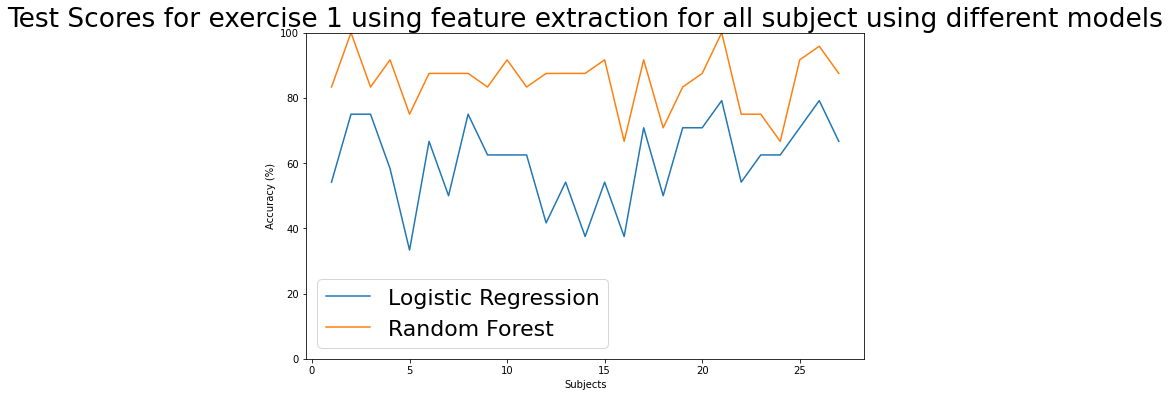

In [282]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_acc_ex1[label])

ax.set_title("Test Scores for exercise 1 using feature extraction for all subject using different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.legend(['Logistic Regression', 'Random Forest']);

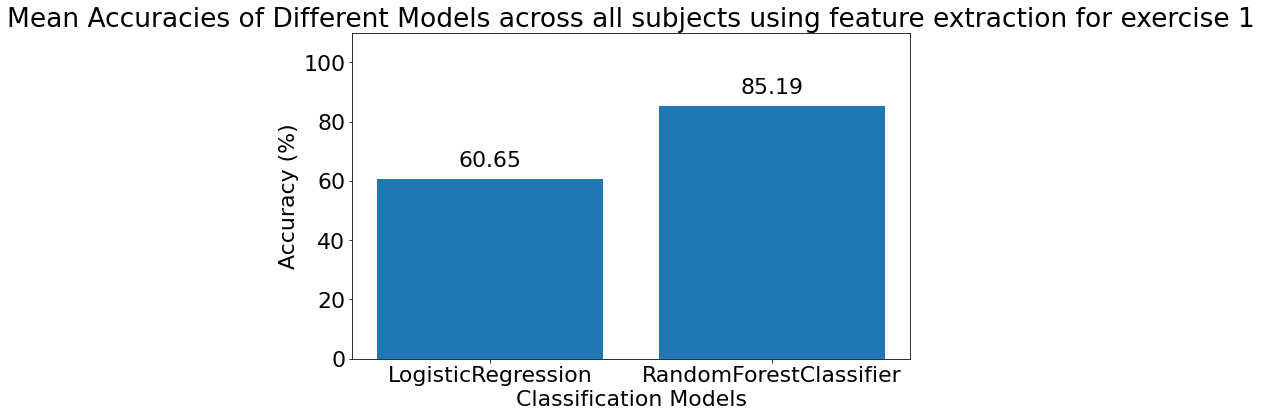

In [287]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

mean_accuracies_ex1 = {}

for label, model in models.items():
    mean_accuracies_ex1[label] = np.mean(test_acc_ex1[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_ex1.keys(), mean_accuracies_ex1.values())
ax.set_title("Mean Accuracies of Different Models across all subjects using feature extraction for exercise 1")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_ex1.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 2**

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

test_acc_ex2 = {}

# Initialize lists for each model .. Each list should contain 27 values(number of subjects)
for label, model in models.items():
    test_acc_ex2[label] = []


ex2_movements = np.arange(1,18)

for sub in np.arange(1,28):
    data = load_data_DB1(subject=sub, exercise=2)

    features_df = pd.DataFrame()
    features_df['target'] = 1
#     movements_df = pd.DataFrame()

    for m in ex2_movements:
        df = get_movement_df(data=data, movement=m, target='restimulus')
        x = df.drop("target", axis=1)
        y = df["target"]

#         # Append movements
#         move_flattend = get_movement_df_flattened(data=data, movement=m, target='restimulus')
#         movements_df = movements_df.append(move_flattend, ignore_index=True)

        # Append features extracted from movements
        movement_features_df = extract_features_per_movement(df=x, increment=1, window_size=20, movement=m)
        features_df = features_df.append(movement_features_df, ignore_index=True)
        
    X_features = features_df.drop("target", axis=1)
    y_features = features_df["target"]
    
    X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.2, random_state=42, stratify=y_features)
    
    for label, model in models.items():
        model.fit(X_train_features, y_train_features)
        score = model.score(X_test_features, y_test_features) * 100
        test_acc_ex2[label].append(round(score, 3))
        print(f"Test Accuracy using feature extraction for subject {sub} for exercise 2 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------") 


for label, model in models.items():
    print(f"Average Test Accuracy using feature extraction for exercise 2 across all subjects using {label} is {np.mean(test_acc_ex2[label])}")


#     X = movements_df.drop("target", axis=1)
#     y = movements_df["target"]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#     rfr2 = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
#     rfr2.fit(X_train, y_train)
#     score2 = rfr2.score(X_test, y_test)
#     tes_acc_ex1_raw.append(score2)
    

Test Accuracy using feature extraction for subject 1 for exercise 2 using LogisticRegression is 55.88235294117647
Test Accuracy using feature extraction for subject 1 for exercise 2 using RandomForestClassifier is 76.47058823529412
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 2 for exercise 2 using LogisticRegression is 67.64705882352942
Test Accuracy using feature extraction for subject 2 for exercise 2 using RandomForestClassifier is 82.35294117647058
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 3 for exercise 2 using LogisticRegression is 76.47058823529412
Test Accuracy using feature extraction for subject 3 for exercise 2 using RandomForestClassifier is 91.17647058823529
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 4

Test Accuracy using feature extraction for subject 27 for exercise 2 using LogisticRegression is 79.41176470588235
Test Accuracy using feature extraction for subject 27 for exercise 2 using RandomForestClassifier is 88.23529411764706
-----------------------------------------------------------------------------------
Average Test Accuracy using feature extraction for exercise 2 across all subjects using LogisticRegression is 59.47711111111111
Average Test Accuracy using feature extraction for exercise 2 across all subjects using RandomForestClassifier is 85.40307407407407


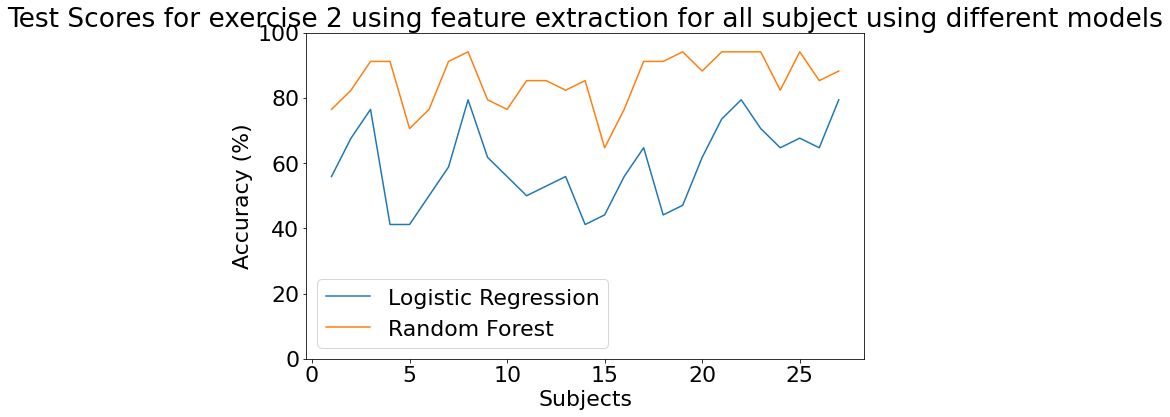

In [286]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_acc_ex2[label])

ax.set_title("Test Scores for exercise 2 using feature extraction for all subject using different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.legend(['Logistic Regression', 'Random Forest']);

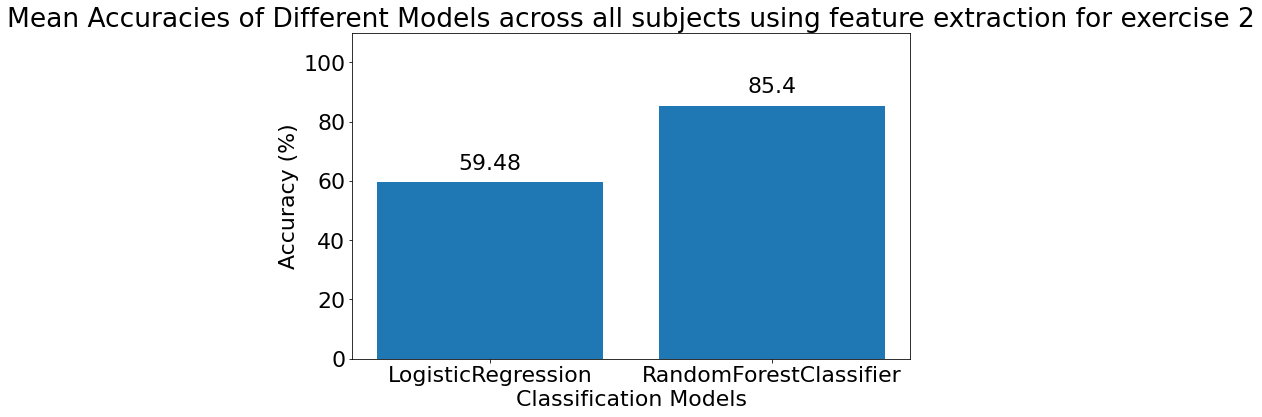

In [288]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

mean_accuracies_ex2 = {}

for label, model in models.items():
    mean_accuracies_ex2[label] = np.mean(test_acc_ex2[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_ex2.keys(), mean_accuracies_ex2.values())
ax.set_title("Mean Accuracies of Different Models across all subjects using feature extraction for exercise 2")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_ex2.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 3**

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

test_acc_ex3 = {}

# Initialize lists for each model .. Each list should contain 27 values(number of subjects)
for label, model in models.items():
    test_acc_ex3[label] = []


ex3_movements = np.arange(1,24)

for sub in np.arange(1,28):
    data = load_data_DB1(subject=sub, exercise=3)

    features_df = pd.DataFrame()
    features_df['target'] = 1
#     movements_df = pd.DataFrame()

    for m in ex3_movements:
        df = get_movement_df(data=data, movement=m, target='restimulus')
        x = df.drop("target", axis=1)
        y = df["target"]

#         # Append movements
#         move_flattend = get_movement_df_flattened(data=data, movement=m, target='restimulus')
#         movements_df = movements_df.append(move_flattend, ignore_index=True)

        # Append features extracted from movements
        movement_features_df = extract_features_per_movement(df=x, increment=1, window_size=20, movement=m)
        features_df = features_df.append(movement_features_df, ignore_index=True)
        
    X_features = features_df.drop("target", axis=1)
    y_features = features_df["target"]
    
    X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.2, random_state=42, stratify=y_features)
    
    for label, model in models.items():
        model.fit(X_train_features, y_train_features)
        score = model.score(X_test_features, y_test_features) * 100
        test_acc_ex3[label].append(round(score, 3))
        print(f"Test Accuracy using feature extraction for subject {sub} for exercise 2 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------") 


for label, model in models.items():
    print(f"Average Test Accuracy using feature extraction for exercise 3 across all subjects using {label} is {np.mean(test_acc_ex3[label])}")


#     X = movements_df.drop("target", axis=1)
#     y = movements_df["target"]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#     rfr2 = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
#     rfr2.fit(X_train, y_train)
#     score2 = rfr2.score(X_test, y_test)
#     tes_acc_ex1_raw.append(score2)
    

Test Accuracy using feature extraction for subject 1 for exercise 2 using LogisticRegression is 63.04347826086957
Test Accuracy using feature extraction for subject 1 for exercise 2 using RandomForestClassifier is 86.95652173913044
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 2 for exercise 2 using LogisticRegression is 47.82608695652174
Test Accuracy using feature extraction for subject 2 for exercise 2 using RandomForestClassifier is 71.73913043478261
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 3 for exercise 2 using LogisticRegression is 50.0
Test Accuracy using feature extraction for subject 3 for exercise 2 using RandomForestClassifier is 69.56521739130434
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 4 for exercise

Test Accuracy using feature extraction for subject 27 for exercise 2 using LogisticRegression is 60.86956521739131
Test Accuracy using feature extraction for subject 27 for exercise 2 using RandomForestClassifier is 71.73913043478261
-----------------------------------------------------------------------------------
Average Test Accuracy using feature extraction for exercise 3 across all subjects using LogisticRegression is 52.415481481481464
Average Test Accuracy using feature extraction for exercise 3 across all subjects using RandomForestClassifier is 76.89211111111109


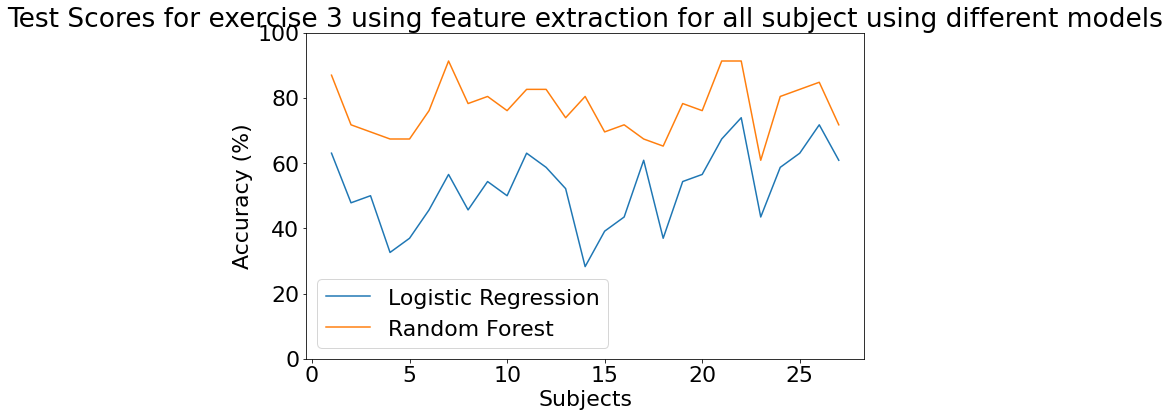

In [290]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_acc_ex3[label])

ax.set_title("Test Scores for exercise 3 using feature extraction for all subject using different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.legend(['Logistic Regression', 'Random Forest']);

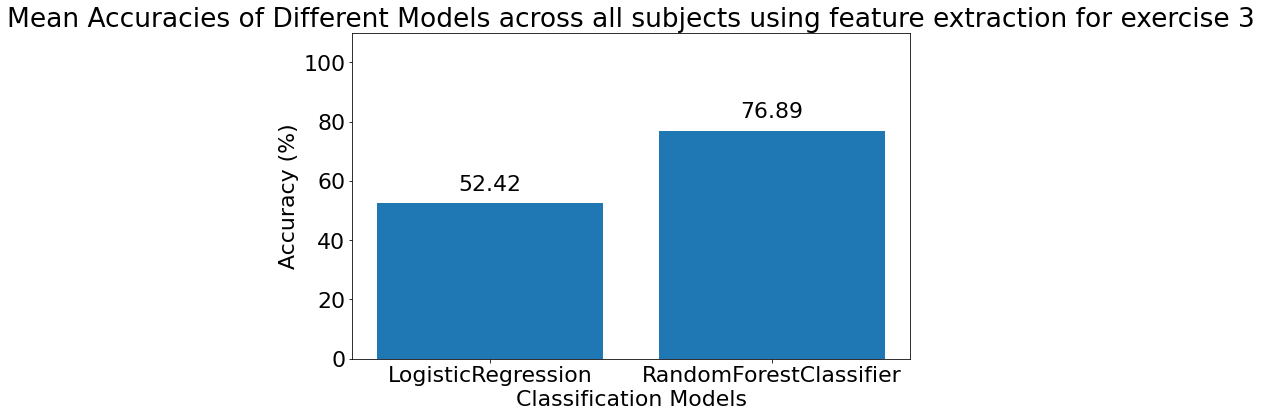

In [291]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

mean_accuracies_ex3 = {}

for label, model in models.items():
    mean_accuracies_ex3[label] = np.mean(test_acc_ex3[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_ex3.keys(), mean_accuracies_ex3.values())
ax.set_title("Mean Accuracies of Different Models across all subjects using feature extraction for exercise 3")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_ex3.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**All Movements**

In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"LogisticRegression": LogisticRegression(max_iter=10000, n_jobs=-1),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100, n_jobs=-1)}

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

test_acc_all = {}

# Initialize lists for each model .. Each list should contain 27 values(number of subjects)
for label, model in models.items():
    test_acc_all[label] = []

    
ex1_movements = np.arange(1,13)
ex2_movements = np.arange(1,18)
ex3_movements = np.arange(1,24)

for sub in np.arange(1,28):

    features_df = pd.DataFrame()
    features_df['target'] = 1
    
    data = load_data_DB1(subject=sub, exercise=1)

    for m in ex1_movements:
        ex1_df = get_movement_df(data=data, movement=m, target='restimulus')
        x1 = ex1_df.drop("target", axis=1)
        y1 = ex1_df["target"]
        
        # Append features extracted from movements
        movement_features_df = extract_features_per_movement(df=x1, increment=1, window_size=20, movement=m)
        features_df = features_df.append(movement_features_df, ignore_index=True)
    
    data = load_data_DB1(subject=sub, exercise=2)

    for m in ex2_movements:
        ex2_df = get_movement_df(data=data, movement=m, target='restimulus')
        x2 = ex2_df.drop("target", axis=1)
        y2 = ex2_df["target"] + 12
        
        # Append features extracted from movements
        movement_features_df = extract_features_per_movement(df=x2, increment=1, window_size=20, movement=m)
        movement_features_df['target'] = movement_features_df['target'] + 12
        features_df = features_df.append(movement_features_df, ignore_index=True)
        
    data = load_data_DB1(subject=sub, exercise=3)

    for m in ex3_movements:
        ex3_df = get_movement_df(data=data, movement=m, target='restimulus')
        x3 = ex3_df.drop("target", axis=1)
        y3 = ex3_df["target"] + 29
        
        # Append features extracted from movements
        movement_features_df = extract_features_per_movement(df=x3, increment=1, window_size=20, movement=m)
        movement_features_df['target'] = movement_features_df['target'] + 29
        features_df = features_df.append(movement_features_df, ignore_index=True)
        
    X_features = features_df.drop("target", axis=1)
    y_features = features_df["target"]
    
    X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.2, random_state=42, stratify=y_features)
    
    for label, model in models.items():
        model.fit(X_train_features, y_train_features)
        score = model.score(X_test_features, y_test_features) * 100
        test_acc_all[label].append(round(score, 3))
        print(f"Test Accuracy using feature extraction for subject {sub} for all 52 movements using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------") 


for label, model in models.items():
    print(f"Average Test Accuracy using feature extraction for all 52 movements across all subjects using {label} is {np.mean(test_acc_all[label])}")


Test Accuracy using feature extraction for subject 1 for all 52 movements using LogisticRegression is 48.07692307692308
Test Accuracy using feature extraction for subject 1 for all 52 movements using RandomForestClassifier is 79.8076923076923
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 2 for all 52 movements using LogisticRegression is 48.07692307692308
Test Accuracy using feature extraction for subject 2 for all 52 movements using RandomForestClassifier is 77.88461538461539
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 3 for all 52 movements using LogisticRegression is 53.84615384615385
Test Accuracy using feature extraction for subject 3 for all 52 movements using RandomForestClassifier is 69.23076923076923
-----------------------------------------------------------------------------------
Test Accuracy usi

Test Accuracy using feature extraction for subject 26 for all 52 movements using RandomForestClassifier is 87.5
-----------------------------------------------------------------------------------
Test Accuracy using feature extraction for subject 27 for all 52 movements using LogisticRegression is 64.42307692307693
Test Accuracy using feature extraction for subject 27 for all 52 movements using RandomForestClassifier is 75.0
-----------------------------------------------------------------------------------
Average Test Accuracy using feature extraction for all 52 movements across all subjects using LogisticRegression is 49.715074074074074
Average Test Accuracy using feature extraction for all 52 movements across all subjects using RandomForestClassifier is 77.13674074074073


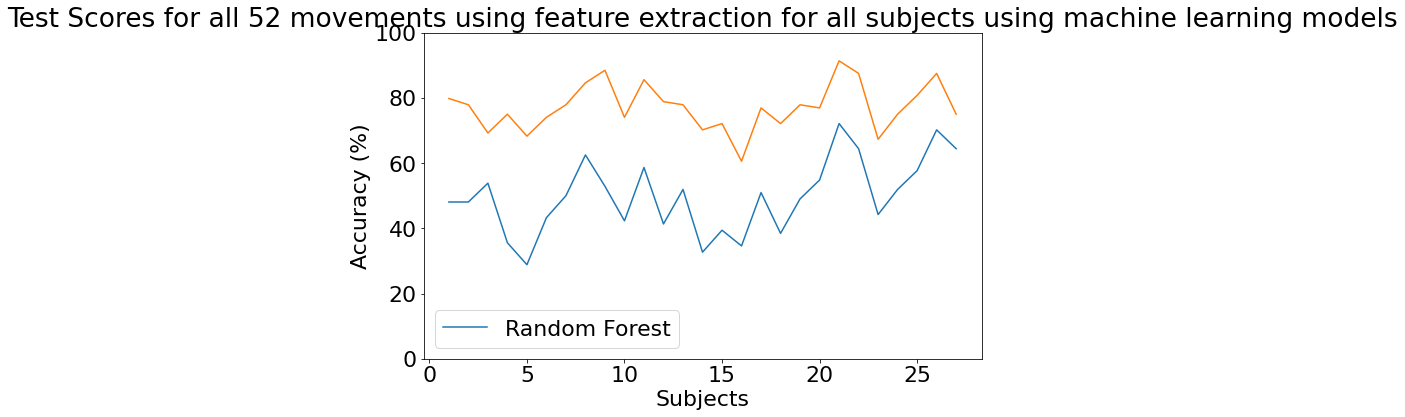

In [300]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_acc_all[label])

ax.set_title("Test Scores for all 52 movements using feature extraction for all subjects using machine learning models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.legend(['Random Forest']);

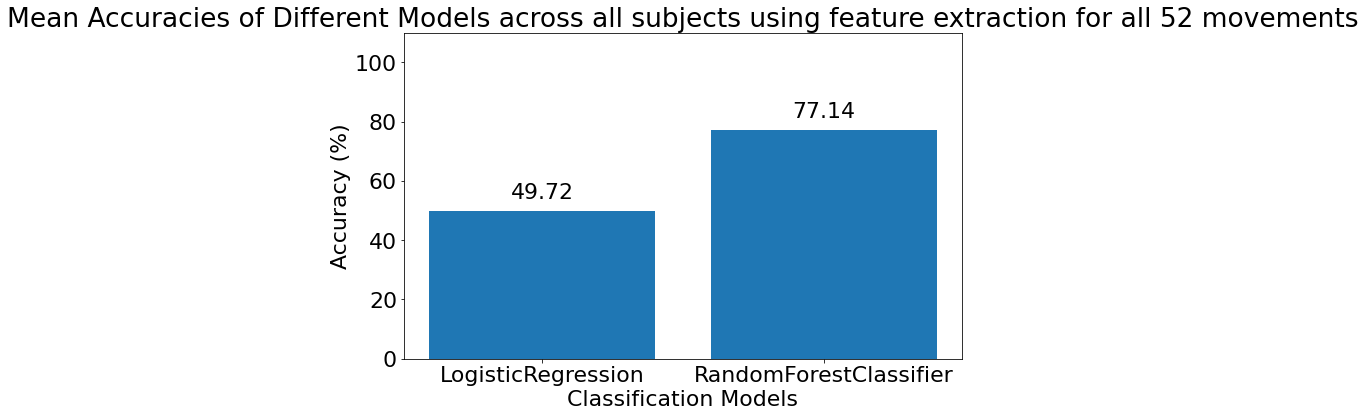

In [301]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

mean_accuracies_all = {}

for label, model in models.items():
    mean_accuracies_all[label] = np.mean(test_acc_all[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_all.keys(), mean_accuracies_all.values())
ax.set_title("Mean Accuracies of Different Models across all subjects using feature extraction for all 52 movements")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_all.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')